# Data Handling - Quick Intro to Pandas

Lets start by importing the package:

In [67]:
import pandas as pd

In [68]:
#help(pd.DataFrame)

DataFrame is a very important class inside pandas, that allows to structure data in a unified way. This class has  many interesting methods that can help transforme/analyze data.

## Reading Data

In [69]:
# Lets start by reading a csv file


data = pd.read_csv('data/AirPassengers.csv')
data.to_stata("data/AirPassengers.dta")
data.to_excel("data/AirPassengers.xlsx")
data.to_json("data/AirPassengers.json")


data.head()
#pd.DataFrame.head(data)


,TravelDate,Passengers
0,1/1/1949,112
1,2/1/1949,118
2,3/1/1949,132
3,4/1/1949,129
4,5/1/1949,121


In [70]:
# Since the DataFrame is an important class that we will use many times it is better to call it a shorter name, say df

from pandas import DataFrame as df

df.head(data)

,TravelDate,Passengers
0,1/1/1949,112
1,2/1/1949,118
2,3/1/1949,132
3,4/1/1949,129
4,5/1/1949,121


In [71]:
data_json = pd.read_json('data/AirPassengers.json')
data_excel = pd.read_excel('data/AirPassengers.xlsx')
data_stata = pd.read_stata('data/AirPassengers.dta')
data_json.head()

,TravelDate,Passengers
0,1/1/1949,112
1,2/1/1949,118
10,11/1/1949,104
100,5/1/1957,355
101,6/1/1957,422


## Selecting a column

In [72]:
data['TravelDate'].head(5)

0    1/1/1949
1    2/1/1949
2    3/1/1949
3    4/1/1949
4    5/1/1949
Name: TravelDate, dtype: object

In [73]:
# an alternative way that looks a lot like Matlab is the iloc method
data.iloc[100:105,:]

,TravelDate,Passengers
100,5/1/1957,355
101,6/1/1957,422
102,7/1/1957,465
103,8/1/1957,467
104,9/1/1957,404


## Data Index 

It is important to check the index. For instance, you might be interested in having the dates as an index when working with a times series

In [74]:
data.index = data['TravelDate']
data.head()

,TravelDate,Passengers
TravelDate,,
1/1/1949,1/1/1949,112
2/1/1949,2/1/1949,118
3/1/1949,3/1/1949,132
4/1/1949,4/1/1949,129
5/1/1949,5/1/1949,121


In [75]:
data2 = data['Passengers']

## Quick Plot

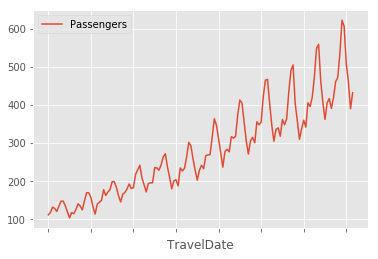

In [76]:
import matplotlib.pyplot as plt
plt.style.use('ggplot') # Make the graphs a bit prettier
data.plot()

## Describing Data

In [77]:
#help(pd.DataFrame.describe)

data.describe(include='all')

,TravelDate,Passengers
count,144,144.000000
unique,144,NaN
top,4/1/1951,NaN
freq,1,NaN
mean,NaN,280.298611
std,NaN,119.966317
min,NaN,104.000000
25%,NaN,180.000000
50%,NaN,265.500000
75%,NaN,360.500000


In [78]:
# A great feature of Pandas is that simililarly to the symbol $ in R, 
# each variable becomes an attribute to the dataframe.
data.Passengers.describe()

count    144.000000
mean     280.298611
std      119.966317
min      104.000000
25%      180.000000
50%      265.500000
75%      360.500000
max      622.000000
Name: Passengers, dtype: float64

## Slicing and Dropping

In [79]:
# To slice 
data['Passengers'][0:10]


TravelDate
1/1/1949     112
2/1/1949     118
3/1/1949     132
4/1/1949     129
5/1/1949     121
6/1/1949     135
7/1/1949     148
8/1/1949     148
9/1/1949     136
10/1/1949    119
Name: Passengers, dtype: int64

In [80]:
# To drop a variable
data.drop(labels='Passengers', axis=1).head(5)

,TravelDate
TravelDate,
1/1/1949,1/1/1949
2/1/1949,2/1/1949
3/1/1949,3/1/1949
4/1/1949,4/1/1949
5/1/1949,5/1/1949


In [81]:
# To drop an observation
data.drop(['2/1/1949', '4/1/1949'], axis=0).head(5)

,TravelDate,Passengers
TravelDate,,
1/1/1949,1/1/1949,112
3/1/1949,3/1/1949,132
5/1/1949,5/1/1949,121
6/1/1949,6/1/1949,135
7/1/1949,7/1/1949,148


## Counting 

In [82]:
data['Passengers'].value_counts()


229    3
180    2
196    2
404    2
405    2
306    2
178    2
172    2
170    2
315    2
461    2
318    2
347    2
348    2
148    2
355    2
362    2
135    2
199    2
118    2
235    2
264    2
242    2
237    2
472    2
284    1
356    1
374    1
340    1
342    1
      ..
234    1
236    1
243    1
181    1
422    1
125    1
146    1
126    1
129    1
132    1
133    1
505    1
136    1
140    1
141    1
391    1
145    1
149    1
171    1
150    1
407    1
406    1
413    1
158    1
417    1
162    1
163    1
420    1
166    1
259    1
Name: Passengers, Length: 118, dtype: int64

## Writing the DataFrame to any file extension

In [83]:
# Lets write the data into a different file type say stata (dta)
data = data.drop(labels='TravelDate', axis=1)
data.to_stata('newdatatype.dta')

In [84]:
# We can eve write it to latex! Very handy! Lets write the count table to latex in one line!

data['Passengers'].value_counts().head(5).to_latex('newtable.tex')

## Transformations

In [85]:
import numpy as np
log_data = data.copy()

log_data['Passengers'] = np.log(data['Passengers'])

In [86]:
data.head(5)

,Passengers
TravelDate,
1/1/1949,112
2/1/1949,118
3/1/1949,132
4/1/1949,129
5/1/1949,121


## Datetime in Pandas

In [87]:
dates = pd.to_datetime(data.index)
dates

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='TravelDate', length=144, freq=None)

In [88]:
data.index = dates

In [89]:
data.head(5)

,Passengers
TravelDate,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [90]:
# Now we are able to use a couple of useful things
print(data.index.month)
print(data.index.weekday) # where 0 is Monday

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
             3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
           dtype='int64', name='TravelDate', length=144)
Int64Index([5, 1, 1, 4, 6, 2, 4, 0, 3, 5,
            ...
            1, 4, 6, 2, 4, 0, 3, 5, 1, 3],
           dtype='int64', name='TravelDate', length=144)


In [91]:
# Now we can add it as a variable to our dataset
data['weekday'] = data.index.weekday
data[:5]

,Passengers,weekday
TravelDate,,
1949-01-01,112,5
1949-02-01,118,1
1949-03-01,132,1
1949-04-01,129,4
1949-05-01,121,6


## Grouping 

In [92]:
import numpy as np
weekday_counts = data.groupby('weekday').aggregate(np.mean)
weekday_counts

,Passengers
weekday,
0,290.947368
1,270.130435
2,285.421053
3,271.952381
4,296.714286
5,268.300000
6,280.523810


In [93]:
weekday_counts.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts

,Passengers
Monday,290.947368
Tuesday,270.130435
Wednesday,285.421053
Thursday,271.952381
Friday,296.714286
Saturday,268.300000
Sunday,280.523810


### Exercise 13.1

- Read in the data from the following link: https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Wages1.csv. Take a look at the data. Describe it.
- Check the last 5 observations of the dataset.
- Create a new data frame with only wages. 
- Transform wages into log wages.
- Save you log wages data into an excel file.
- Compute the average wages for each sex.
- Group all variables average by sex.
- Count how many female there are in the dataset.

## Web scrapping

The web has sometimes an address with data or an API. Other times, the url does not point to any structured data, but we can scan its html code to get what we are interested

In [96]:
url = 'https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/AirPassengers.csv'
AirPassengers = pd.read_csv(url,index_col='time', parse_dates=True, encoding='latin1')
AirPassengers.drop(labels='Unnamed: 0', axis=1).head()
#AirPassengers.head(5)

,value
time,
1949-01-01,112
1949-01-01,118
1949-01-01,132
1949-01-01,129
1949-01-01,121


### Now lets do scrape IMDB

In [114]:
# First thing we need is to get the HTML info
from requests import get

url = 'http://www.imdb.com/title/tt4555426/?ref_=nv_sr_1'

response = get(url)
print(response.text[:500])

# We can use google chrome to identify objects we are interested in the HTML structure
# the rating of this moving is in <span itemprop="ratingValue">7.4</span>








<!DOCTYPE html>
<html
    xmlns:og="http://ogp.me/ns#"
    xmlns:fb="http://www.facebook.com/2008/fbml">
    <head>
         
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge">

    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///title/tt4555426?src=mdot">



        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>

<script>
    if (typeof uet == 'function') {
      ue


### BeautifulSoup to parse the HTML content

In [115]:
from bs4 import BeautifulSoup

html_soup = BeautifulSoup(response.text, 'html.parser')
type(html_soup)

bs4.BeautifulSoup

In [116]:
movie_rating = html_soup.find_all('div', class_= 'ratingValue')[0]
#print(type(movie_rating))
#print(len(movie_rating))
score = float(movie_rating.select('span')[0].text)


In [110]:
score

7.4

In [124]:
# Suppouse we want the year of the movie as well - <a href="/year/2017/?ref_=tt_ov_inf">2017</a> 
movie_year = html_soup.find_all('span', id="titleYear")
movie_year[0].text


'(2017)'

### Exercise 13.2

- Use the search url of IMDB (http://www.imdb.com/search/title?release_date=2017&sort=num_votes,desc&page=1) and get the top 50 movies Titles and their ratings. Then save it in a latex file.

In [126]:
#answers 13.2

## Accessing Data Remotely - Pandas DataReader

First install pandas_datareader. Open a new terminal and type:

`pip install pandas-datareader`

and

`pip install git+https://github.com/pydata/pandas-datareader.git`

to update it to its latest version.

### FRED

In [147]:
import pandas as pd

import pandas_datareader.data as web

import datetime

start = datetime.datetime(2010, 1, 1)

end = datetime.datetime(2018, 1, 27)

gdp = web.DataReader('GDP', 'fred', start, end)


### Eurostat

import pandas_datareader.data as web

Get Rail accidents by type of accident (ERA data) data. The result will be a DataFrame which has DatetimeIndex as index and MultiIndex of attributes or countries as column. The target URL is:

- http://appsso.eurostat.ec.europa.eu/nui/show.do?dataset=tran_sf_railac&lang=en


You can specify dataset ID ‘tran_sf_railac’ to get corresponding data via DataReader.


df = web.DataReader('tran_sf_railac', 'eurostat')


In [149]:
df = web.DataReader('tran_sf_railac', 'eurostat')


### World Bank

Either from exploring the World Bank site, or using the search function included, every world bank indicator is accessible.

For example, if you wanted to compare the Gross Domestic Products per capita in constant dollars in North America, you would use the search function:

In [21]:
from pandas_datareader import wb
mathces = wb.search('gdp.*capita.*const')

mathces

,id,name,source,sourceNote,sourceOrganization,topics,unit
646,6.0.GDPpc_constant,"GDP per capita, PPP (constant 2011 internation...",LAC Equity Lab,GDP per capita based on purchasing power parit...,b'World Development Indicators (World Bank)',Economy & Growth,
7858,NY.GDP.PCAP.KD,GDP per capita (constant 2010 US$),World Development Indicators,GDP per capita is gross domestic product divid...,"b'World Bank national accounts data, and OECD ...",Economy & Growth,
7860,NY.GDP.PCAP.KN,GDP per capita (constant LCU),World Development Indicators,GDP per capita is gross domestic product divid...,"b'World Bank national accounts data, and OECD ...",Economy & Growth,
7862,NY.GDP.PCAP.PP.KD,"GDP per capita, PPP (constant 2011 internation...",World Development Indicators,GDP per capita based on purchasing power parit...,"b'World Bank, International Comparison Program...",Economy & Growth,
7863,NY.GDP.PCAP.PP.KD.87,"GDP per capita, PPP (constant 1987 internation...",WDI Database Archives,,b'',,


In [150]:
dat = wb.download(indicator='NY.GDP.PCAP.KD', country=['US', 'CA', 'MX', 'PT'], start=2005, end=2008)

dats

NameError: name 'wb' is not defined

In [31]:
 wb.search('cell.*%')

,id,name,source,sourceNote,sourceOrganization,topics,unit
6232,IT.CEL.COVR.ZS,Population covered by mobile cellular network (%),WDI Database Archives,,b'',,
6287,IT.MOB.COV.ZS,Population coverage of mobile cellular telepho...,Africa Development Indicators,Please cite the International Telecommunicatio...,"b'International Telecommunication Union, World...",,


In [39]:
ind = ['NY.GDP.PCAP.KD', 'IT.MOB.COV.ZS']
dat = wb.download(indicator=ind, country='all', start=2011, end=2011).dropna()
dat.columns = ['gdp', 'cellphone']
dat

,,gdp,cellphone
country,year,,
Benin,2011,758.577521,99.00
Botswana,2011,6610.331922,96.00
Central African Republic,2011,458.333018,56.00
Chad,2011,867.999063,75.00
"Congo, Dem. Rep.",2011,345.481220,50.00
"Congo, Rep.",2011,2751.910680,95.00
Cote d'Ivoire,2011,1138.664957,92.10
"Egypt, Arab Rep.",2011,2593.596902,99.70
Eritrea,2011,514.179598,85.00


### IEX Finance

In [152]:
import pandas_datareader.data as web

from datetime import datetime

start = datetime(2015, 2, 9)

end = datetime(2018, 8, 29)

apple = web.DataReader('AAPL', 'iex', start, end)


896

---

# Data Analysis

### Linear Regression

You can do regression analysis with many alternative functions/classes in python. Two well documented modules are:

- StatsModels

- scikit-learn

The first one is a more classical approach to regression while the second library is a machine learning module that includes regression.

In [153]:
import pandas as pd

import numpy as np

import statsmodels.api as sm

import statsmodels.formula.api as smf

# Load data
dat = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Wages1.csv')

# Fit regression model (using the natural log of one of the regressors)
results = smf.ols('wage ~ exper', data=dat).fit()

# Inspect the results
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     8.714
Date:                Wed, 29 Aug 2018   Prob (F-statistic):            0.00318
Time:                        15:55:00   Log-Likelihood:                -8571.0
No. Observations:                3294   AIC:                         1.715e+04
Df Residuals:                    3292   BIC:                         1.716e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.1678      0.208     24.875      0.0

Alternatively, we could use arrays directly instead of a formula:

In [11]:
X = dat['exper']

X = sm.add_constant(X)

y = dat['wage']

# Fit regression model
results = sm.OLS(y, X).fit()

# Inspect the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     8.714
Date:                Wed, 29 Aug 2018   Prob (F-statistic):            0.00318
Time:                        08:32:37   Log-Likelihood:                -8571.0
No. Observations:                3294   AIC:                         1.715e+04
Df Residuals:                    3292   BIC:                         1.716e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.1678      0.208     24.875      0.0

### Exercise 13.3

- Get unemployment and inflation (consumer price) annual data from 1960 to 2016. Download the data from FRED either manually or download it using the datareader. 

- Do a scatter plot of inflation and unemployment.

- Regress inflation on unemployment.

- Plot the regression line fit on top of the scatter plot.
